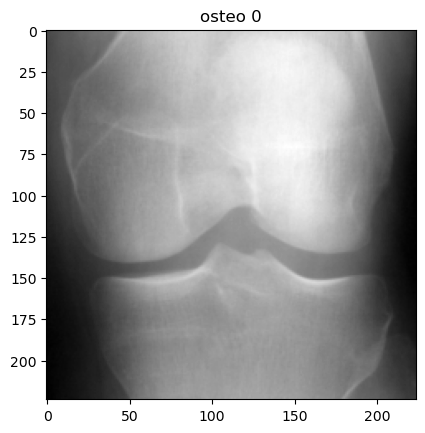

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
# !pip install opencv-python
import cv2

# data 경로 설정
# C:\workspace\Pneumonia\Positive
data_dir = 'C:/workspace/osteoarthritis/train/0/'
# categories = ['train','test','val'] # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[0]
img_path = os.path.join(data_dir, img_name)
# img_path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # rgb 채널을 1개로 줄여서 데이터의 크기를 낮춘다

plt.imshow(img, cmap='gray')
plt.title('osteo 0')
plt.show()

In [ ]:
def resize_image(img, size=(128,128)):
    return cv2.resize(img,size)

def he_img(img):
    return cv2.equalizeHist(img) # 명암을 평활화 시킨다.

def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))   
    cl_img = clahe.apply(img)
    return cl_img

def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

def detect_edge(img):
    return cv2.Canny(img, 100, 200)

def blur_img(img):
    return cv2.GaussianBlur(img, (5,5), 0) # 가우시안 분포 =(유사) 정규분포

def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # 윤곽선
    return contours

In [ ]:
def load_data(data_dir): # 데이터 전처리 함수
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
    
    prepared_datas = np.array(images)
    return prepared_datas